In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade pythainlp

     |████████████████████████████████| 11.0MB 239kB/s 
     |████████████████████████████████| 747kB 30.9MB/s 


In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
from functools import * 
import matplotlib as mpl
plt.rcParams['font.family'] = 'tahoma'
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=10)

In [32]:
%matplotlib inline

In [5]:
df = pd.read_csv("/content/drive/MyDrive/BADS7105_CRM_ANALYTICS_AND_INTELLIGENT/HW_11_Voice_of_Customers/CustomerReviews.csv")

<Figure size 1152x576 with 0 Axes>

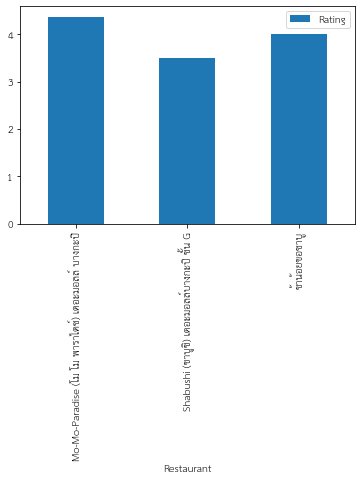

In [6]:
plt.figure(figsize=(16,8))
df.groupby("Restaurant").mean()[["Rating"]].plot.bar()
plt.savefig("Plot_easy.png")

In [7]:
df["บริการ"] = np.where( df["ประเด็นที่พูด"].str.count("บริการ") > 0 , 1 , 0)
df["อาหาร"] = np.where( df["ประเด็นที่พูด"].str.count("อาหาร") > 0 , 1 , 0)
df["ราคา"] = np.where( df["ประเด็นที่พูด"].str.count("ราคา") > 0 , 1 , 0)

In [8]:
df

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,ประเด็นที่พูด,Rating,บริการ,อาหาร,ราคา
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,บริการ อาหาร ราคา,5.0,1,1,1
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,บริการ อาหาร,5.0,1,1,0
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,บริการ อาหาร ราคา,4.0,1,1,1
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,อาหาร ราคา,4.0,0,1,1
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,บริการ อาหาร,5.0,1,1,0
5,6,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,12f2b56b28bb4849a92690cedc1cc50a,กินให้อิ่ม ที่ momo,ร้านบุฟเฟ่ ชาบูแนวญี่ปุ่น สายเนื้อหมู เนื้อวัว...,อาหาร ราคา,4.0,0,1,1
6,7,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,f2628bf47a394345b133fec76a79661d,ชาบู - สุกกี้สไลต์ญี่ปุ่นที่แท้ทรู,Number 20 : โมโม – พาราไดส์ (สาขาเดอะมอลบางกะป...,อาหาร ราคา,4.0,0,1,1
7,8,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,backscrash,ร้านชาบูเฟรนไชส์ ที่ราคาเหมาะสมกับคุณภาพ ถือว่...,ร้านชาบูเฟรนไชส์รสชาติดีมากคุ้มค่าเหมาะสมกับรา...,อาหาร ราคา,4.0,0,1,1
8,9,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,a477a5812ada4d5b80fd04fca22bdbca,อร่อยคุ้ม ของทานเล่นเยอะมาก,มา านที่ขาบูชิต้องมาตอนหิว ไม่งั้นจะไม่คุ้มนะค...,อาหาร ราคา,4.0,0,1,1
9,10,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,fd2ba94ec1bc4948ae109e2cb6c9cbc6,ทานอีก ชอบกุ้งทอดเทมปุระ,ใครชอบกุ้งทอดเทมปุระ แค่กุ้งเทมปุระก็คุ้มแล้ว ...,อาหาร,3.0,0,1,0


In [9]:
def thai_tokenizer(text):
    from pythainlp.tokenize import word_tokenize
    return word_tokenize(text, keep_whitespace=False)

def remove_repettition(text):
    token_list = list(text)
    if len(token_list) > 2:
        filter_list = [True, True]
        n = len(token_list)
        for i in range(2, n):
            if (token_list[i] == token_list[i-1]) and (token_list[i] == token_list[i-2]):
                filter_list.append(False)
            else:
                filter_list.append(True)

        output = ''.join(np.array(token_list)[filter_list])
    else:
        output = text
    return output

def cleansing(text):
    # \t, \n, \xa0 and other special characters. Replace by blank string
    text = re.sub('[\t\n\xa0\"\'!?\/\(\)%\:\=\-\+\*\_ๆ#$&,<>]', '', text)
    
    # Numbers. Replace by space
    text = re.sub('[0-9]', ' ', text)
    
    # Dot. Replace by space
    text = re.sub('[\.]', ' ', text)
    
    # One or more consecutive space. Replace by single space
    text = re.sub('\s+',' ',text)
    
    # Remove 2 or more repettition
    text = remove_repettition(text)
    test_string = text
    pattern = re.compile(r"[^\u0E00-\u0E7Fa-zA-Z' ]|^'|'$|''")
    char_to_remove = re.findall(pattern, test_string)
    list_with_char_removed = [char for char in test_string if not char in char_to_remove]
    result_string = ''.join(list_with_char_removed)
    return result_string

In [10]:
from pythainlp.tokenize import word_tokenize
def tknzt(wrd) :
  ttkn =  word_tokenize(wrd,engine="newmm")
  return " ".join([i for i in ttkn if i.strip() != ""])

In [11]:
from pythainlp.tokenize import crfcut

df["Review_Cln"] = list(map(cleansing, df['Review']))
df["Headline_Cln"] = list(map(cleansing, df['Headline']))

In [12]:
df["Sentence_Cut"] = list(map(crfcut.segment, df["Review_Cln"]))

In [13]:
df["Text_Tkn"] = list(map(tknzt, df['Review_Cln']))

In [45]:
print('------------- Original Vs Clean --------------')
print()
print("Original : ",df.iloc[1,5])
print()
print("Clean : ",df.iloc[1,-4])
print()

------------- Original Vs Clean --------------

Original :  นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไดซ์ คุณภาพเค้ามาตราฐานจริงๆ วันนี้มีโอกาสมาทานก่อนร้านปิด 30 นาที ทางร้านก็บริการดี จะมีก็แต่อาหาร เครื่องดื่มที่ทางร้านเริ่มทะยอยเก็บ แต่เราก็เข้าใจเพราะทางร้านแจ้งรายละเอียดการงดรับออร์เดอร์แล้ว 
           สาขานี้ พนักงานบริการดี น่ารักเป็นกันเอง ขออะไรก็ได้หมด ไม่มีเหวี่ยง เคยเจอสาขา พระราม 9 คือ ไม่โอเค พนักงาน ไม่พร้อมทำงานมาก CTW แม้จะเป็นพรีเมียมการบริการก็สู้สาขานี้ไม่ได้ Terminal 21 ลูกค้าเยอะ

Clean :  นึกถึง ชาบู ญี่ปุ่น ยังไง ก็ ต้อง คิดถึง โม โม่ พาราไดซ์ คุณภาพ เค้า มาตรา ฐาน จริง วันนี้ มีโอ กา สมาทาน ก่อน ร้าน ปิด นาที ทาง ร้าน ก็ บริการ ดี จะ มี ก็ แต่ อาหาร เครื่องดื่ม ที่ทาง ร้าน เริ่ม ทะยอย เก็บ แต่ เรา ก็ เข้าใจ เพราะ ทาง ร้าน แจ้ง รายละเอียด การงด รับ ออร์เดอร์ แล้ว สาขา นี้ พนักงานบริการ ดี น่ารัก เป็นกันเอง ขอ อะไร ก็ได้ หมด ไม่ มี เหวี่ยง เคย เจอ สาขา พระราม คือ ไม่ โอเค พนักงาน ไม่ พร้อม ทำงาน มาก CTW แม้ จะ เป็น พรีเมียม การ บริการ ก็ สู้ สาขา นี้ ไม่ ได

In [14]:
df["Service"] = np.where(df["ประเด็นที่พูด"].str.count("บริการ") > 0 , 1 , 0 )
df["Food"] = np.where(df["ประเด็นที่พูด"].str.count("อาหาร") > 0 , 1 , 0 )
df["Price"] = np.where(df["ประเด็นที่พูด"].str.count("ราคา") > 0 , 1 , 0 )

In [15]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pythainlp.tokenize import word_tokenize
from pythainlp.tokenize import sent_tokenize
from pythainlp.corpus import thai_stopwords
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
df_in = df.iloc[:-1,:]
df_out = df.iloc[-1:,:]
X = df_in[["Text_Tkn"]]
y = df_in[["บริการ","อาหาร","ราคา"]]
tfidf_vect = TfidfVectorizer(tokenizer=thai_tokenizer, stop_words=thai_stopwords() , ngram_range = (1,1))
X_feature = tfidf_vect.fit_transform(df_in["Text_Tkn"].values)
X_train, X_test, y_train, y_test = train_test_split( X_feature, y, test_size=0.2, random_state=42)
# data_tfidf_vect = tfidf_vect.fit_transform(df_test['cln_again'])
clf = LinearSVC()
ovs_model = OneVsRestClassifier(clf, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['กระไร', 'กาลนาน', 'ชิ้น', 'ดังที่', 'ดี', 'ดีกว่า', 'ด้อย', 'ตัว', 'ต่อไป', 'ถัดไป', 'ทั่วถึง', 'ทำ', 'ที่จะ', 'ท่าน', 'ท้าย', 'นา', 'บอ', 'บัด', 'ระยะเวลา', 'ล่ะ', 'วันวาน', 'สม', 'สมบูรณ์', 'สํา', 'หน้า', 'หรับ', 'หา', 'อย', 'เกี่ยว', 'เก่า', 'เดี๋ยวนี้', 'เย็น', 'เล่า', 'เสมือน', 'เหมือนกัน', 'แด่', 'แม้น', 'แหล่', 'โง้น', 'โน้น', 'ใด', 'ไว', 'ไหม'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [17]:
pipeline = Pipeline([
                     ("ovs_clf" , ovs_model)
                     ])

In [18]:
 keep_model = {}
 for category in  y_train :
   pipeline = Pipeline([
                     ("ovs_clf" , ovs_model)
                     ])
   pipeline.fit(X_train,y_train[category])
   keep_model[category] = pipeline

In [19]:
pipeline.fit(X_train,y_train[category])

Pipeline(memory=None,
         steps=[('ovs_clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                         class_weight=None,
                                                         dual=True,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         loss='squared_hinge',
                                                         max_iter=1000,
                                                         multi_class='ovr',
                                                         penalty='l2',
                                                         random_state=None,
                                                         tol=0.0001,
                                                         verbose=0),
                                     n_jobs=-1))],
         verbose=False)

In [20]:
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
prediction = pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test[category].values, prediction)))

Test accuracy is 0.75


In [21]:
df_tfidf = pd.DataFrame(X_feature.todense(), columns=tfidf_vect.get_feature_names())

In [22]:
dddks = {}
ls_acc = []
ls_cate = []
for category in  y_train :
  prediction = keep_model[category].predict(X_test)
  print('Category {} Test accuracy is {}'.format(category,accuracy_score(y_test[category].values, prediction)))
  ls_cate.append(category)
  ls_acc.append(accuracy_score(y_test[category].values, prediction))
dddks["Category"] = ls_cate
dddks["Accuracy"] = ls_acc

Category บริการ Test accuracy is 0.5
Category อาหาร Test accuracy is 1.0
Category ราคา Test accuracy is 0.75


In [28]:
data_accyt = pd.DataFrame(dddks)

<Figure size 1296x864 with 0 Axes>

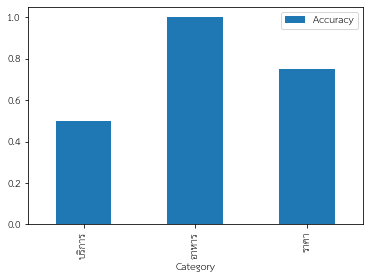

In [33]:
plt.figure(figsize = (18, 12), facecolor = None)
data_accyt.plot.bar(x="Category",y="Accuracy")
plt.savefig("Plot_Category_acc.png",dpi=600)

In [100]:
X_feature_test = tfidf_vect.transform(df_out["Text_Tkn"].values)

In [104]:
dict_result={}
for category in  y_train :
  result = keep_model[category].predict(X_feature_test)
  dict_result[category] = list(result)

In [121]:
result_df = pd.DataFrame(dict_result)
result_df

,บริการ,อาหาร,ราคา
0,1,1,1


In [124]:
ndf_out = df_out.reset_index()

In [151]:
df_tfidf = pd.DataFrame(X_feature_test.todense(), columns=tfidf_vect.get_feature_names())

In [129]:
pd.concat([ndf_out[["Review","Service","Food","Price"]],result_df],axis=1)

,Review,Service,Food,Price,บริการ,อาหาร,ราคา
0,ก็ตามที่เขียนเลยครับ ว่า ถ้าจะจ่ายในราคา 199 บ...,0,1,1,1,1,1


In [175]:
import copy 
from wordcloud import WordCloud, STOPWORDS


In [141]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

In [153]:
df_tfidf = pd.DataFrame(X_feature_test.todense(), columns=tfidf_vect.get_feature_names())
df_tfidf = df_tfidf.T
df_tfidf["TFIDF"] = df_tfidf.sum(axis=1)
dftfidf = pd.DataFrame({"Word" : df_tfidf.index , "TFIDF": df_tfidf["TFIDF"].tolist()})

In [170]:
dfdfdfdfdf_test = copy.deepcopy(dftfidf)
dfdfdfdfdf_test = dfdfdfdfdf_test[dfdfdfdfdf_test["TFIDF"] > 0]
dfdfdfdfdf_test.index = dfdfdfdfdf_test["Word"].tolist()
dfdfdfdfdf_test = dfdfdfdfdf_test.drop("Word",axis=1)

In [171]:
Cloud = WordCloud(font_path="/content/THSarabunChula-Regular.ttf",background_color="white", max_words=50).generate_from_frequencies(dfdfdfdfdf_test.sum(axis=1))

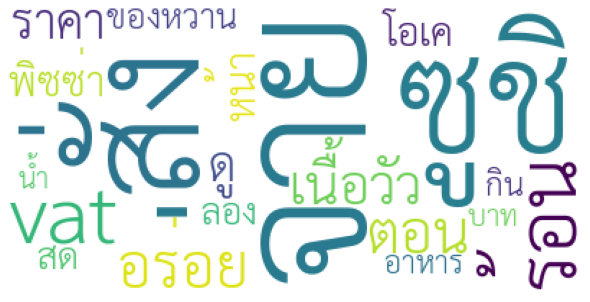

In [174]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(Cloud)
plt.axis("off")
# plt.title(f'Word Cloud by TFIDF {ikan}')
plt.tight_layout(pad = 0)
Cloud.to_file(f'HM10_VOICE.png')
plt.show()